# Evaluation Double Shared State Model

import statements:

In [2]:
import sys
sys.path.append('../')

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from keras.layers import Dense, Dropout

import tensorflow as tf
import numpy as np
from tqdm import tqdm
from keras.layers import Dense, Dropout, GRU


import numpy as np

from machine_learning.models import DoubleStateProduction
from data_processing.batch_generator import load_test_set
tf.random.set_seed(42)

define model:

In [4]:
model = DoubleStateProduction()


In [5]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(),
            tf.keras.metrics.TruePositives(), 
            tf.keras.metrics.TrueNegatives(),
            tf.keras.metrics.FalsePositives(), 
            tf.keras.metrics.FalseNegatives(),
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])


### Dataset

In [6]:
path = '../data'
BATCH_SIZE = 1024
SEQUENCE_LENGTH = 100

In [7]:
test_transactions = np.load(f'{path}/test/transactions.npy')
test_labels = np.load(f'{path}/test/all_transaction_labels.npy').astype(float)
test_set = tf.data.Dataset.from_tensor_slices((test_transactions, test_labels)).batch(1)
# initialize weights
model(np.expand_dims(test_transactions[0], axis=0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.59034586]], dtype=float32)>

### Evaluate Model

In [8]:
num_epochs = 20

In [9]:
results = []
for epoch in range(num_epochs):
    print(f"[EPOCH {epoch}]")
    model_path = f'../machine_learning/saved_models/simpler_double/Double_{epoch}.keras'
    model.load_weights(model_path)
    model.card_gru.reset_states()
    model.category_gru.reset_states()

    results.append(model.evaluate(test_set, return_dict=True))

[EPOCH 0]
555719/555719 [==============================] - 308s 553us/step - loss: 0.0392 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00
[EPOCH 1]
555719/555719 [==============================] - 308s 553us/step - loss: 0.0356 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00
[EPOCH 2]
555719/555719 [==============================] - 316s 569us/step - loss: 0.0301 - binary_accuracy: 0.9961 - true_positives: 82.0000 - true_negatives: 553450.0000 - false_positives: 124.0000 - false_negatives: 2063.0000 - precision: 0.3981 - recall: 0.0382
[EPOCH 3]
555719/555719 [==============================] - 330s 594us/step - loss: 0.0128 - binary_accuracy: 0.9978 - true_positives: 1144.0000 - true_negatives: 553351.0000 - 

In [11]:
import pandas as pd

pd.DataFrame(results)

,loss,binary_accuracy,true_positives,true_negatives,false_positives,false_negatives,precision,recall
0,0.039178,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
1,0.035582,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
2,0.030068,0.996065,82.0,553450.0,124.0,2063.0,0.398058,0.038228
3,0.012835,0.997797,1144.0,553351.0,223.0,1001.0,0.836869,0.533333
4,0.016327,0.996329,1496.0,552183.0,1391.0,649.0,0.518185,0.697436
5,0.013602,0.997328,957.0,553277.0,297.0,1188.0,0.763158,0.446154
6,0.011263,0.997571,1000.0,553369.0,205.0,1145.0,0.829876,0.466200
7,0.017043,0.996837,1483.0,552478.0,1096.0,662.0,0.575029,0.691375
8,0.019176,0.994900,1570.0,551315.0,2259.0,575.0,0.410029,0.731935
9,0.014456,0.997797,1476.0,553019.0,555.0,669.0,0.726736,0.688112


Looking at the metrics, the one which yielded the best results was at **epoch 3** with the best balance between precision and recall:

### Confusion Matrix

In [12]:
model.load_weights(f'../machine_learning/saved_models/simpler_double/Double_{3}.keras')
inputs = [[553351/(553351+223), 223/(553351+223)], [1001/(1144+1001), 1144/(1144+1001)]]

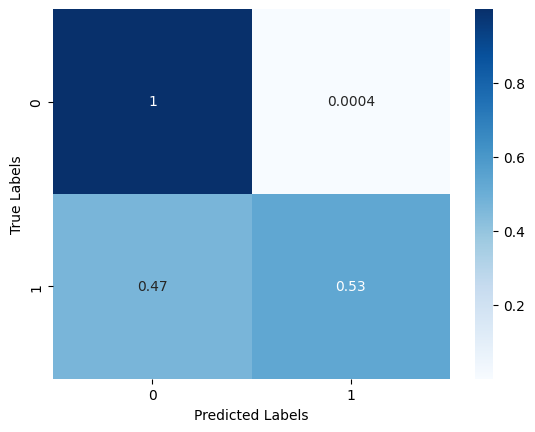

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using a heatmap
sns.heatmap(inputs, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [14]:
y_pred_proba = model.predict(test_set)

555719/555719 [==============================] - 241s 434us/step


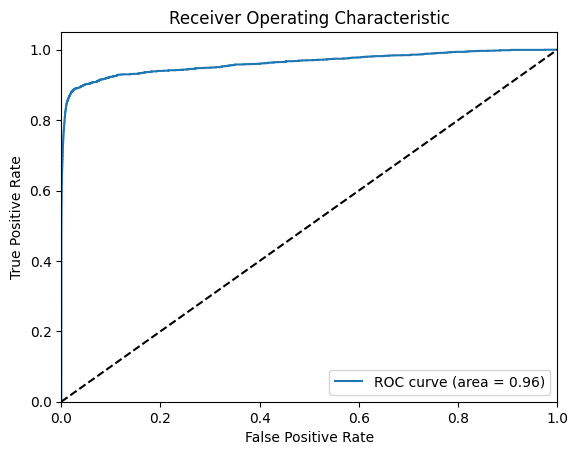

In [15]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds using NumPy
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculate AUC using scikit-learn
auc_score = auc(fpr, tpr)

# Plot ROC curve using Matplotlib
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
